In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

In [2]:
# Run this cell only the first time when you download the big file with all the data
# df = pd.read_csv('../data/trade_i_baci_a_17.tsv', sep='\t', header=0)

# # Filter out all the rows in the dataframe that don't contain the word coffe in the commodity description
# df = df[df[6].str.contains('coffee', case=False)]

# # Drop the rows that contain electric coffee makers (because they are not coffee)
# df = df[~df[6].str.contains('electric', case=False)]

# # Save the filtered dataframe to a csv file
# df.to_csv('../data/coffee_trade_corrected.csv', index=False, header=None)

In [26]:
df = pd.read_csv('../data/coffee_trade_corrected.csv', header=0)
df.head(10)

,year,exporter_id,exporter_name,importer_id,importer_name,hs_code,product_name,hs_revision,value,quantity,unit_abbrevation,unit_name
0,2018,phl,Philippines,pol,Poland,90190,"Coffee: husks and skins, coffee substitutes co...",5,192.0,0.003,mt,Metric Tons
1,2018,phl,Philippines,svk,Slovakia,90111,"Coffee, not roasted, not decaffeinated",5,584.0,0.120,mt,Metric Tons
2,2018,phl,Philippines,svk,Slovakia,90121,"Coffee, roasted, not decaffeinated",5,787.0,0.010,mt,Metric Tons
3,2018,phl,Philippines,swe,Sweden,90111,"Coffee, not roasted, not decaffeinated",5,222.0,0.076,mt,Metric Tons
4,2018,phl,Philippines,swe,Sweden,90112,"Coffee, not roasted, decaffeinated",5,112.0,0.016,mt,Metric Tons
5,2018,phl,Philippines,swe,Sweden,90121,"Coffee, roasted, not decaffeinated",5,228.0,0.030,mt,Metric Tons
6,2018,phl,Philippines,swe,Sweden,210112,"Preparations with a basis of extracts, essence...",5,1015.0,0.162,mt,Metric Tons
7,2018,phl,Philippines,bmu,Bermuda,90190,"Coffee: husks and skins, coffee substitutes co...",5,34.0,0.001,mt,Metric Tons
8,2018,phl,Philippines,can,Canada,90111,"Coffee, not roasted, not decaffeinated",5,3841.0,0.555,mt,Metric Tons
9,2018,phl,Philippines,can,Canada,90112,"Coffee, not roasted, decaffeinated",5,107.0,0.005,mt,Metric Tons


In [27]:
# Insight of all different data that is in the dataframe
df.columns, df["year"].unique()

(Index(['year', 'exporter_id', 'exporter_name', 'importer_id', 'importer_name',
        'hs_code', 'product_name', 'hs_revision', 'value', 'quantity',
        'unit_abbrevation', 'unit_name'],
       dtype='object'),
 array([2018, 2019, 2020, 2021]))

In [4]:
# Drop all rows with year before 2020
df = df[df['year'] >= 2020]
df.product_name.unique()

array(['Coffee, not roasted, not decaffeinated',
       'Coffee, roasted, not decaffeinated',
       'Coffee, roasted, decaffeinated',
       'Extracts, essences and concentrates: of coffee, and preparations with a basis of these extracts, essences or concentrates or with a basis of coffee',
       'Preparations with a basis of extracts, essences or concentrates or with a basis of coffee',
       'Chicory & other coffee substitutes, roasted & product',
       'Coffee: husks and skins, coffee substitutes containing coffee in any proportion',
       'Coffee, not roasted, decaffeinated'], dtype=object)

In [5]:
# Drop the entries that are not "coffe, not roasted"
df_only_coffe = df[df["product_name"].str.contains('not roasted, ', case=False)]
print(df_only_coffe["product_name"].unique())
# Get the total value of coffee exports for each country. Grouping by exporter_id (column 1) and by product_name (column 6) and summing the values in column 9
df_exporters = df_only_coffe.groupby(['exporter_name'], as_index=False)["value"].sum()

# Replace the exporter_id by "other" if the value is less than 10000000000
df_exporters.loc[df_exporters['value'] < 10e8, 'exporter_name'] = 'other'# df_only_coffe = df_only_coffe.groupby(['exporter_id']).sum()
df_exporters = df_exporters.groupby(['exporter_name'], as_index=False)["value"].sum()

df_importers = df_only_coffe.groupby(['importer_name'], as_index=False)["value"].sum()

# Replace the exporter_id by "other" if the value is less than 10000000000
df_importers.loc[df_importers['value'] < 5*10e7, 'importer_name'] = 'other'# df_only_coffe = df_only_coffe.groupby(['exporter_id']).sum()
df_importers = df_importers.groupby(['importer_name'], as_index=False)["value"].sum()

['Coffee, not roasted, not decaffeinated'
 'Coffee, not roasted, decaffeinated']


In [6]:
df_exporters.sort_values(by=['value'], ascending=False, inplace=True)
df_exporters.head(10)

,exporter_name,value
0,Brazil,1.100694e+10
11,other,7.291911e+09
1,Colombia,5.587764e+09
10,Vietnam,4.474198e+09
5,Honduras,2.323262e+09
2,Ethiopia,2.037383e+09
3,Germany,1.823155e+09
7,Indonesia,1.756796e+09
4,Guatemala,1.604206e+09
8,Peru,1.424339e+09


In [7]:
df_importers.sort_values(by=['value'], ascending=False, inplace=True)
df_importers.head(10)

,importer_name,value
15,United States,9.235964e+09
16,other,8.527517e+09
4,Germany,5.533566e+09
1,Belgium,3.063449e+09
5,Italy,2.742563e+09
6,Japan,2.241591e+09
2,Canada,1.367893e+09
3,France,1.344728e+09
11,Spain,1.193103e+09
10,South Korea,1.041901e+09


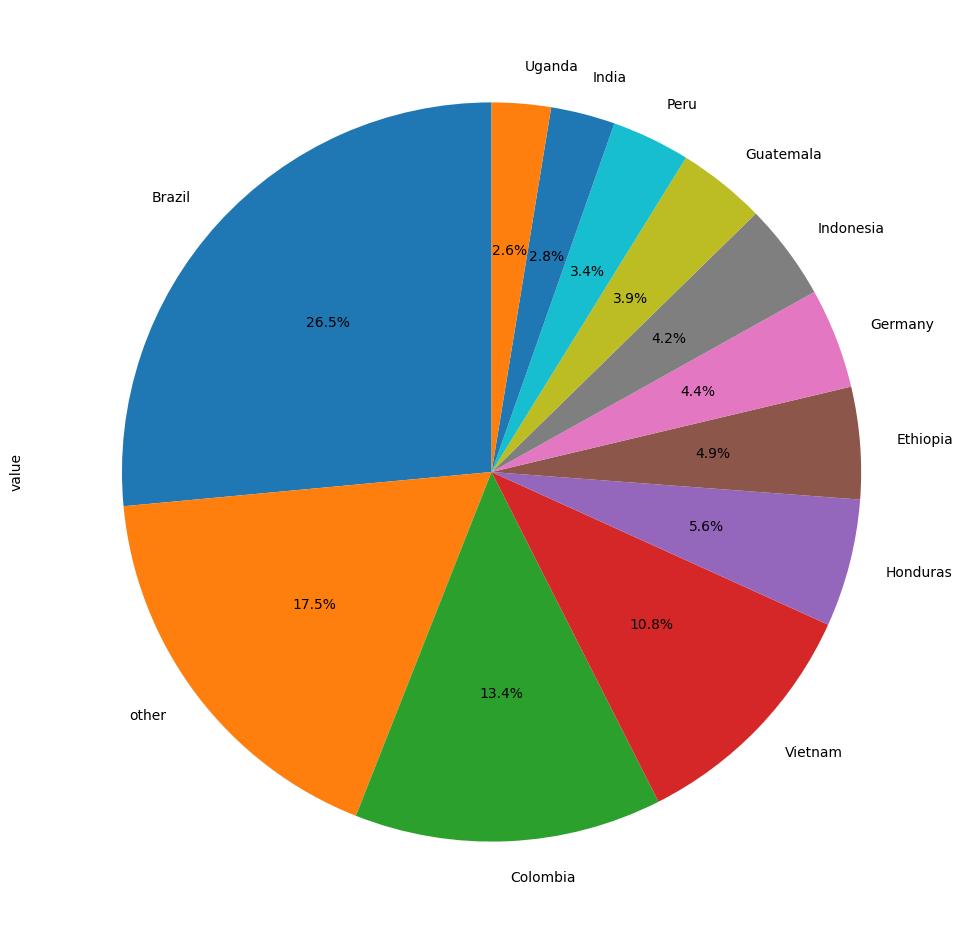

In [23]:
# Plot the data in a pie chart. Display the percentage of each country in the pie chart
df_exporters.plot.pie(y='value', labels=df_exporters['exporter_name'], figsize=(12, 12), autopct='%1.1f%%', startangle=90, legend=False)
# Save the plot as a png file
plt.savefig('../data/figures/coffee_exports_pie.png', transparent=True)

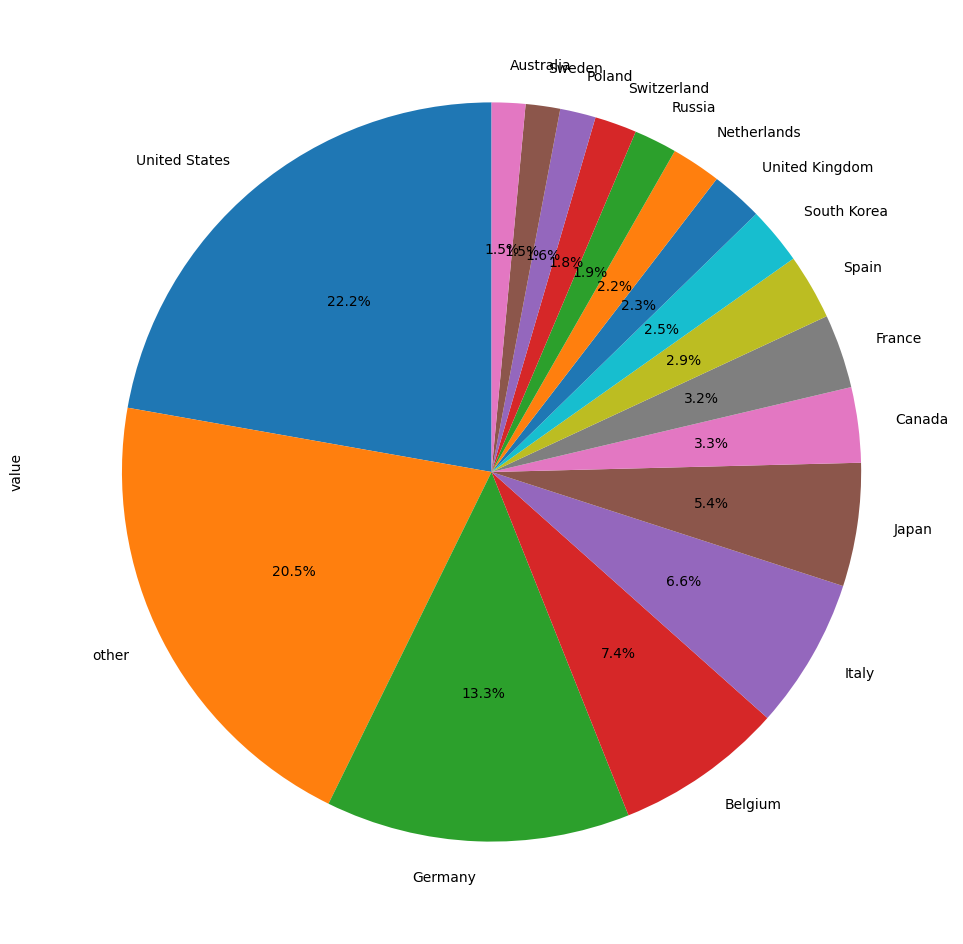

In [25]:
df_importers.plot.pie(y='value', labels=df_importers['importer_name'], figsize=(12, 12), autopct='%1.1f%%', startangle=90, legend=False)
# Save the plot as a png file
plt.savefig('../data/figures/coffee_imports_pie.png', transparent=True)

In [10]:
# Add the percentage of each country in the dataframe 
df_exporters['percentage'] = df_exporters['value']/df_exporters['value'].sum()*100
df_exporters.head(10)

,exporter_name,value,percentage
0,Brazil,1.100694e+10,26.477226
11,other,7.291911e+09,17.540713
1,Colombia,5.587764e+09,13.441382
10,Vietnam,4.474198e+09,10.762695
5,Honduras,2.323262e+09,5.588613
2,Ethiopia,2.037383e+09,4.900930
3,Germany,1.823155e+09,4.385605
7,Indonesia,1.756796e+09,4.225979
4,Guatemala,1.604206e+09,3.858923
8,Peru,1.424339e+09,3.426252


In [11]:
# Prin the percentage of exports from Brazil in format "dd.dd%"
print('Exports from Brazil: {:.2f}%'.format(df_exporters[df_exporters['exporter_name'] == 'Brazil']['percentage'].values[0]))

Exports from Brazil: 26.48%


In [12]:
# The same for the importers
df_importers['percentage'] = df_importers['value']/df_importers['value'].sum()*100
df_importers.head(10)

,importer_name,value,percentage
15,United States,9.235964e+09,22.217136
16,other,8.527517e+09,20.512965
4,Germany,5.533566e+09,13.311009
1,Belgium,3.063449e+09,7.369136
5,Italy,2.742563e+09,6.597243
6,Japan,2.241591e+09,5.392153
2,Canada,1.367893e+09,3.290470
3,France,1.344728e+09,3.234746
11,Spain,1.193103e+09,2.870012
10,South Korea,1.041901e+09,2.506295


In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/_5/fqyrkr3158n4sdc3y6xyy59w0000gn/T/ipykernel_3719/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/_5/fqyrkr3158n4sdc3y6xyy59w0000gn/T/ipykernel_3719/942626102.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


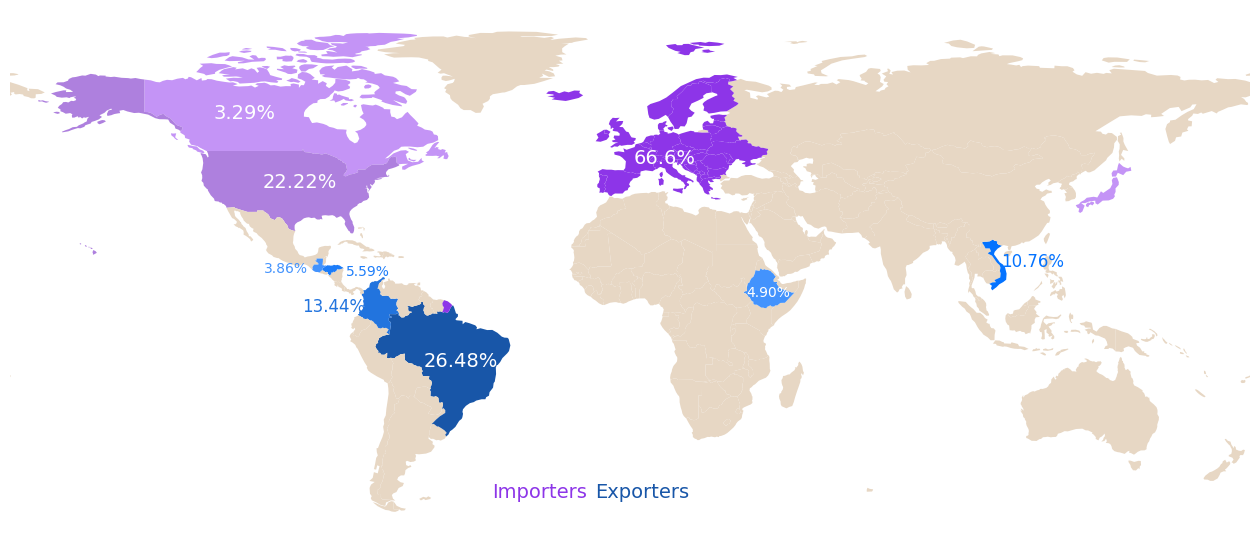

In [20]:
# Create a new map colouring only Brazil and Vietnam in blue and the others in white using geopandas
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 9))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['color'] = '#e7d7c4'

# Set the colors to the exporters
world.loc[world['name'].isin(['Brazil']), 'color'] = '#1856a8'
world.loc[world['name'].isin(['Colombia']), 'color'] = '#2274DE'
world.loc[world['name'].isin(['Vietnam']), 'color'] = '#0473FF'
world.loc[world['name'].isin(["Honduras"]), 'color'] = '#1D7DF9'
world.loc[world['name'].isin(["Ethiopia"]), 'color'] = '#4393FD'
world.loc[world['name'].isin(["Guatemala"]), 'color'] = '#4393FD'

# Set the colors to the importers
world.loc[world['name'].isin(['United States of America']), 'color'] = '#AE80DE'
world.loc[world['continent'].isin(['Europe']), 'color'] = '#8D35E8'
world.loc[world['name'].isin(['Japan']), 'color'] = '#c494f6' 
world.loc[world['name'].isin(['Canada']), 'color'] = '#c494f6'

world.loc[world['name'].isin(['Russia']), 'color'] = '#e7d7c4'

# Plot french guayana in green

world.plot(ax=ax, color=world['color'])

# Make the countries borders black
# world.boundary.plot(ax=ax, color='grey', linewidth=0.5)

# Add the text labels

ax.text(-49, -12, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Brazil']['percentage'].values[0]),
         ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
ax.text(-86, 4, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Colombia']['percentage'].values[0]),
         ha='center', va='center', fontsize=12, color='#2274DE', transform=ccrs.PlateCarree())
ax.text(117, 17, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Vietnam']['percentage'].values[0]),
         ha='center', va='center', fontsize=12, color='#0473FF', transform=ccrs.PlateCarree())
ax.text(-76, 14, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Honduras']['percentage'].values[0]),
         ha='center', va='center', fontsize=10, color='#1D7DF9', transform=ccrs.PlateCarree())
ax.text(40, 8, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Ethiopia']['percentage'].values[0]),
         ha='center', va='center', fontsize=10, color='white', transform=ccrs.PlateCarree())
ax.text(-100, 15, "{:.2f}%".format(df_exporters[df_exporters['exporter_name'] == 'Guatemala']['percentage'].values[0]), 
        ha='center', va='center', fontsize=10, color='#4393FD', transform=ccrs.PlateCarree())

# Add a text label in the US
ax.text(-96, 40, "{:.2f}%".format(df_importers[df_importers['importer_name'] == 'United States']['percentage'].values[0]),
         ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
# Add a text label in Europe
ax.text(10, 47, '66.6%', ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())
# Add a text label in Japan
ax.text(140, 30, "{:.2f}%".format(df_importers[df_importers['importer_name'] == 'Japan']['percentage'].values[0]),
         ha='center', va='center', fontsize=14, color='#c494f6', transform=ccrs.PlateCarree())
# Add a text label in Canada
ax.text(-112, 60, "{:.2f}%".format(df_importers[df_importers['importer_name'] == 'Canada']['percentage'].values[0]),
         ha='center', va='center', fontsize=14, color='white', transform=ccrs.PlateCarree())

# Set the background color to #ceae89
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')

# Remove the axes
ax.axis('off')

# Add a legend in the left bottom corner stating that orange is for the US and blue for Brazil
ax.text(-40, -50, 'Importers', ha='left', va='center', fontsize=14, color='#8D35E8', transform=ccrs.PlateCarree())
ax.text(-10, -50, 'Exporters', ha='left', va='center', fontsize=14, color='#1856a8', transform=ccrs.PlateCarree())

# Save the figure
fig.savefig('coffee-trade-2.png', dpi=300, bbox_inches='tight')
ax.set_extent([-180, 180, -60, 90])
plt.show()